#### CNN example

In [25]:
### Data import
import pandas as pd

data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

print("The shape of the train dataset is {}".format(data_train.shape))
print("The shape of the test dataset is {}".format(data_test.shape))

data_test.head(n=10)

The shape of the train dataset is (60000, 785)
The shape of the test dataset is (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,...,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,44,88,99,122,123,80,0,0,0,0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,212,240,213,239,233,239,231,232,236,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,235,210,241,222,171,220,199,236,27,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220,244,206,0,87,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,2,0,0,0,0,0,140,116,85,109,121,63,0,0,0,0,0,0,0,0,...,50,0,0,0,0,0,0,0,29,19,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,184,127,185,198,213,239,126,237,255,236,173,4,0,0,0,0,0,0,0,0,...,90,55,0,0,0,0,0,255,243,255,4,209,255,254,255,255,255,255,255,255,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,235,202,166,180,207,217,228,112,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,70,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,0,0,0,0,0,0,0,0,0,0,0,34,68,34,0,0,0,0,0,0,0,0,0,34,136,102,105,98,74,64,34,27,20,13,20,27,47,71,85,85,91,136,27,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0,122,149,119,115,119,125,132,129,125,125,129,122,125,139,132,132,10,0,0,0,0,0,0,0,0,0,0,0,0,23,57,105,108,115,125,125,122,122,125,119,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,0,0,108,25,0,0,0,132,54,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,61,102,117,158,87,66,175,109,131,87,43,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,136,183,169,151,167,161,145,174,146,196,197,136,215,42,0,3,0,0,0,0,0,0,0,0,0,0,1,0,82,172,159,150,140,142,164,160,153,202,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,204,0,0,1,0,0,0,...,57,216,2,0,0,0,0,0,19,43,67,101,133,166,164,166,122,8,0,0,0,0,0,0,0,0,3,0,75,192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,92,66,0,0,0,0,81,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,75,111,118,171,172,153,150,176,193,117,129,103,56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,113,121,108,124,126,122,122,121,121,121,117,104,110,69,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [26]:
### data set is big so we would be working on the test dataset as our main dataset
data_test = data_test.values
X = data_test[:,1:]
Y = data_test[:,0]

The shape of the X_Transformed is (10000, 28, 28, 1)


The shape of the X_train dataset is (8000, 28, 28, 1)
The shape of the Y_train dataset is (8000,)
The shape of the X_test dataset is (2000, 28, 28, 1)
The shape of the Y_test dataset is (2000,)


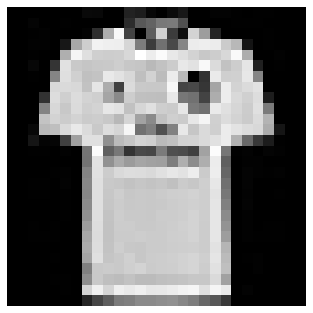

In [31]:
## Data visulization and preprocessing
"""Conv layer take image as input so shape must be either(28,28,3) or (28,28,1)"""
X_Transformed = X.reshape((-1,28,28,1))

print("The shape of the X_Transformed is {}\n\n".format(X_Transformed.shape))


from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X_Transformed,Y,test_size=0.2)

print("The shape of the X_train dataset is {}".format(X_Train.shape))
print("The shape of the Y_train dataset is {}".format(Y_Train.shape))
print("The shape of the X_test dataset is {}".format(X_Test.shape))
print("The shape of the Y_test dataset is {}".format(Y_Test.shape))

import matplotlib.pyplot as plt
def displayImage(img):
    plt.style.use("seaborn")
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.show()
displayImage(X_Transformed[0])

In [32]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout

In [33]:
"""Transforming y as one hot vector"""
Y_ = np_utils.to_categorical(Y_Train)
print("The shape of the Y is {}".format(Y_.shape))

The shape of the Y is (8000, 10)


In [34]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)              

In [35]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [37]:
hist = model.fit(X_Train,Y_,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 6400 samples, validate on 1600 samples
Epoch 1/20
6400/6400 [==============================] - 19s 3ms/step - loss: 7.1638 - accuracy: 0.1239 - val_loss: 2.3018 - val_accuracy: 0.1138
Epoch 2/20
6400/6400 [==============================] - 16s 3ms/step - loss: 2.3017 - accuracy: 0.1039 - val_loss: 2.3011 - val_accuracy: 0.1112
Epoch 3/20
6400/6400 [==============================] - 18s 3ms/step - loss: 2.3005 - accuracy: 0.1013 - val_loss: 2.2998 - val_accuracy: 0.1106
Epoch 4/20
6400/6400 [==============================] - 20s 3ms/step - loss: 2.2998 - accuracy: 0.1020 - val_loss: 2.2994 - val_accuracy: 0.1125
Epoch 5/20
6400/6400 [==============================] - 17s 3ms/step - loss: 2.2944 - accuracy: 0.1102 - val_loss: 2.2931 - val_accuracy: 0.1281
Epoch 6/20
6400/6400 [==============================] - 17s 3ms/step - loss: 2.1463 - accuracy: 0.2241 - val_loss: 2.0499 - val_accuracy: 0.2700
Epoch 7/20
6400/6400 [==============================] - 21s 3ms/step - loss: 1.804

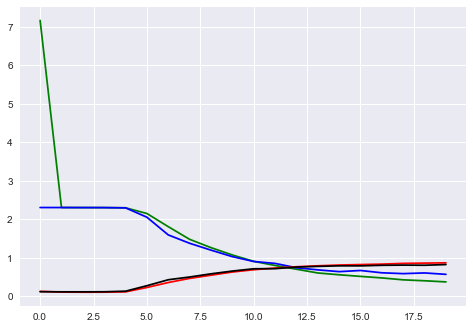

In [40]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()